# 📌 Step 1: Import Libraries

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Sample dataset
data = [
    ("Flu", "Fever", "Tamiflu"),
    ("COVID-19", "Cough", "Paxlovid"),
    ("Malaria", "Chills", "Artemisinin"),
    ("Migraine", "Headache", "Ibuprofen"),
    ("Diabetes", "Fatigue", "Metformin"),
    ("Asthma", "Shortness of Breath", "Albuterol"),
    ("Hypertension", "High Blood Pressure", "Lisinopril"),
    ("Tuberculosis", "Cough", "Rifampin"),
    ("Depression", "Sadness", "Fluoxetine"),
    ("Chickenpox", "Itchy Rash", "Acyclovir"),
]

# 📌 Step 2: Building the Graph

In [22]:
G = nx.DiGraph()

# Add nodes and edges with node attribute 'type'
for disease, symptom, medicine in data:
    G.add_node(disease, type='Disease')
    G.add_node(symptom, type='Symptom')
    G.add_node(medicine, type='Medicine')

    # Edges: Disease->Symptom, Disease->Medicine
    G.add_edge(disease, symptom, label='has_symptom')
    G.add_edge(disease, medicine, label='treated_by')

# Separate nodes by type
diseases = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Disease']
symptoms = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Symptom']
medicines = [n for n, attr in G.nodes(data=True) if attr['type'] == 'Medicine']

# Define circle radii
r_symptom = 1
r_disease = 3
r_medicine = 5

pos = {}

# Position diseases evenly on a circle (center circle)
angle_gap = 2 * np.pi / len(diseases)
for i, node in enumerate(diseases):
    angle = i * angle_gap
    x = r_disease * np.cos(angle)
    y = r_disease * np.sin(angle)
    pos[node] = (x, y)

# Position symptoms evenly on smaller inner circle
angle_gap_sym = 2 * np.pi / len(symptoms)
for i, node in enumerate(symptoms):
    angle = i * angle_gap_sym
    x = r_symptom * np.cos(angle)
    y = r_symptom * np.sin(angle)
    pos[node] = (x, y)

# Position medicines evenly on larger outer circle
angle_gap_med = 2 * np.pi / len(medicines)
for i, node in enumerate(medicines):
    angle = i * angle_gap_med
    x = r_medicine * np.cos(angle)
    y = r_medicine * np.sin(angle)
    pos[node] = (x, y)

# 📌 Step 3: Visualizing the Graph

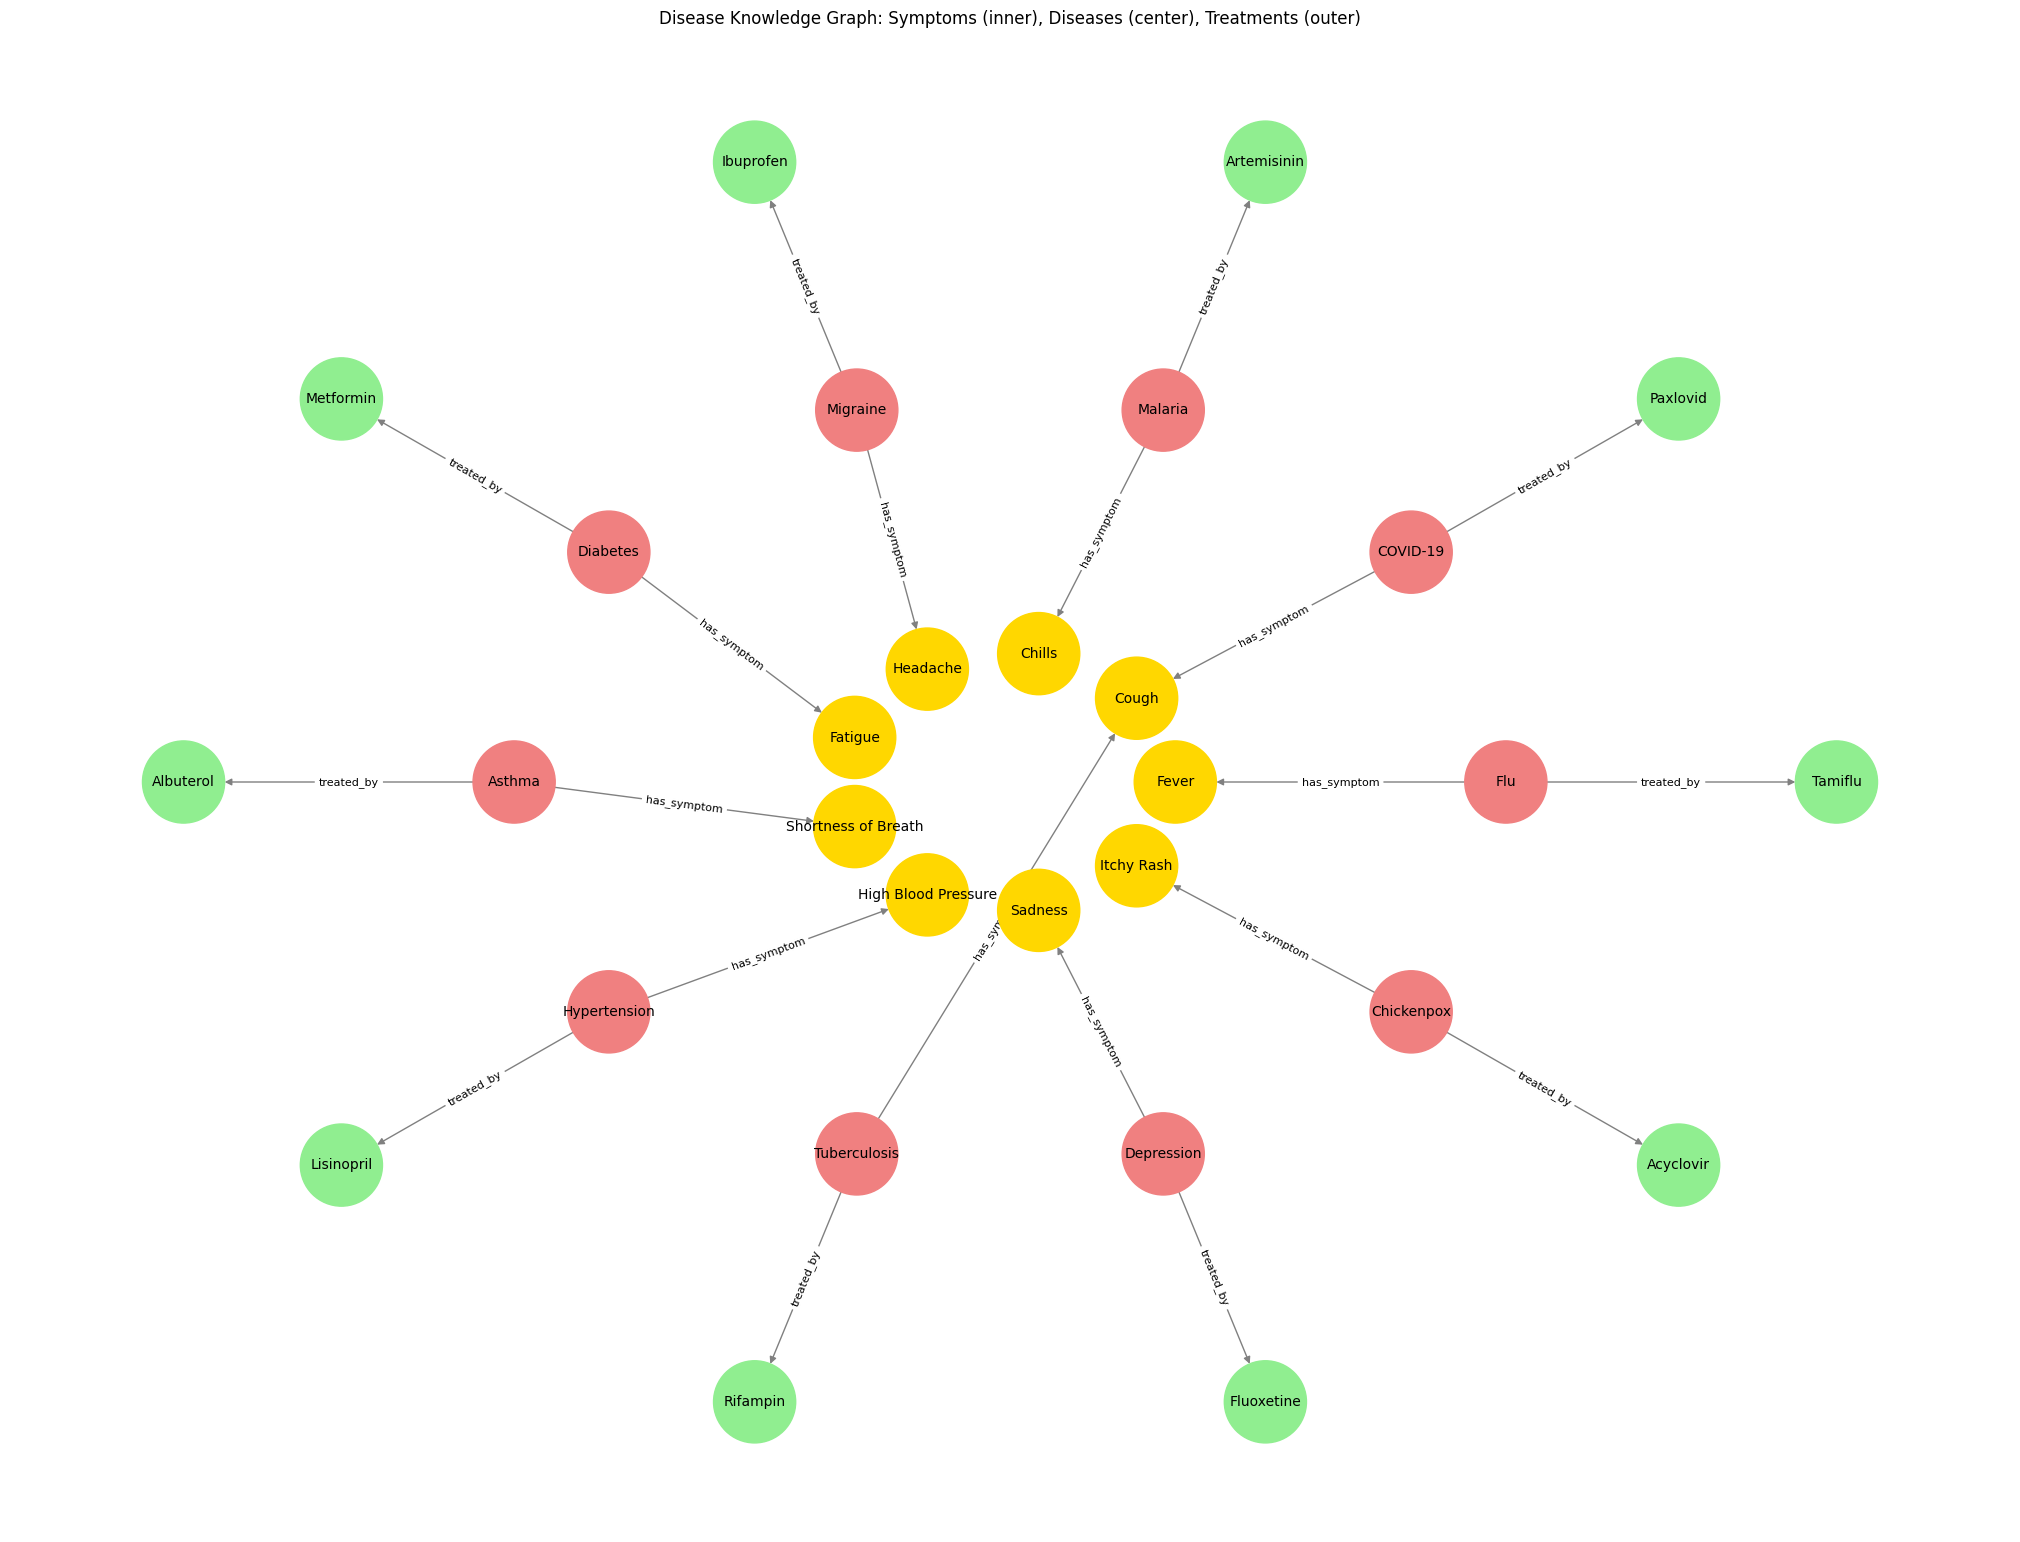

In [28]:
# Node colors by type
color_map = []
for node in G.nodes(data=True):
    if node[1]['type'] == 'Disease':
        color_map.append('lightcoral')
    elif node[1]['type'] == 'Symptom':
        color_map.append('gold')
    else:
        color_map.append('lightgreen')

plt.figure(figsize=(20, 15))

nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=3500, font_size=10, edge_color='gray', arrows=True)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)

plt.title("Disease Knowledge Graph: Symptoms (inner), Diseases (center), Treatments (outer)")
plt.axis('off')
plt.savefig("disease_graph.png")
plt.show()